# Разведочный анализ данных. Исследование и визуализация данных

# Текстовое описание набора данных 

В качестве набора данных мы будем использовать набор данных по предсказанию поступления в аспирантуру

Данные доступны по ссылке https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
Эта задача является актуальной для людей, собирающихся поступать в аспирантуру, и которым необходимо оценить свои шансы.

Датасет состоит из 1 файла:
- Admission_Predict.csv

Файл содержит следующие колонки:
- GRE Scores  - баллы за экзамен GRE для поступления в магистратуру/аспирантуру.
- TOEFL Scores - баллы за экзамен TOEFL по английскому.
- University Rating - рейтинг университета.
- SOP - мотивация соискателя
- LOR - сила рекомендательного письма.
- CGPA - средний балл аттестата.
- Research- наличие опыта в исследовательских работах.
- Chance of Admit - шанс приема.

# Импорт библиотек
Импортируем библиотеки с помощью команды import.

In [1]:
%pip install -q seaborn

In [40]:
%pip install -q scipy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета с помощью библиотеки Pandas

In [3]:
data = pd.read_csv('Admission_Predict.csv')

# Основые характеристики датасета
выводим первые 5 строк

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(400, 9)

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 400


In [7]:
# Список колонок
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# Список колонок с типами данных
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Serial No. - 0
GRE Score - 0
TOEFL Score - 0
University Rating - 0
SOP - 0
LOR  - 0
CGPA - 0
Research - 0
Chance of Admit  - 0


In [10]:
# Основные статистические характеристки набора данных
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
data.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
# Определим уникальные значения для целевого признака
data['Chance of Admit '].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39])

# Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

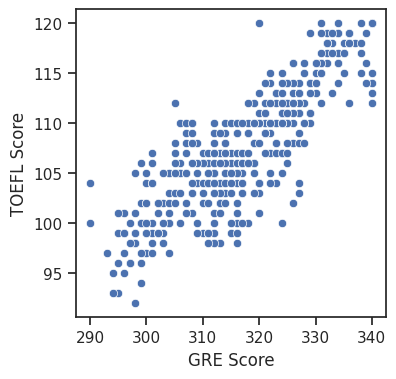

In [27]:
fig, ax = plt.subplots(figsize=(4,4)) 
sns.scatterplot(ax=ax, x='GRE Score', y='TOEFL Score', data=data)


Можно видеть что между полями GRE Score и TOEFL пристутствует почти линейная зависимость.

Посмотрим насколько на эту зависимость влияет целевой признак.

<AxesSubplot:xlabel='GRE Score', ylabel='TOEFL Score'>

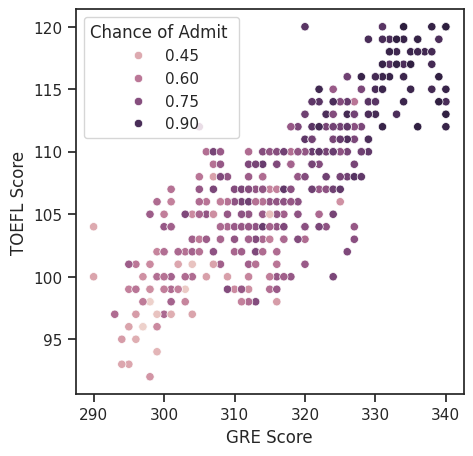

In [28]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='GRE Score', y='TOEFL Score', data=data, hue='Chance of Admit ')

## Гистограмма
Позволяет оценить плотность вероятности распределения данных.

<ipython-input-15-cfca1a0acb15>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GRE Score'])


<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

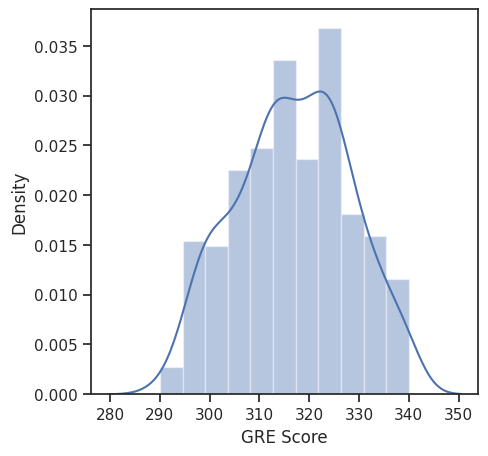

In [15]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['GRE Score'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

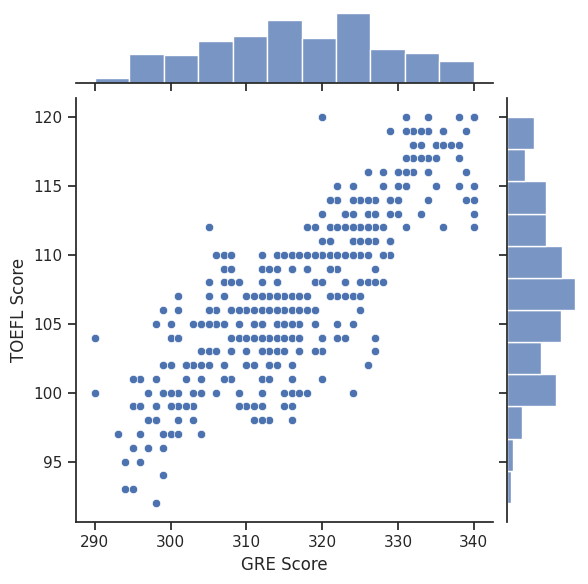

In [16]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data)

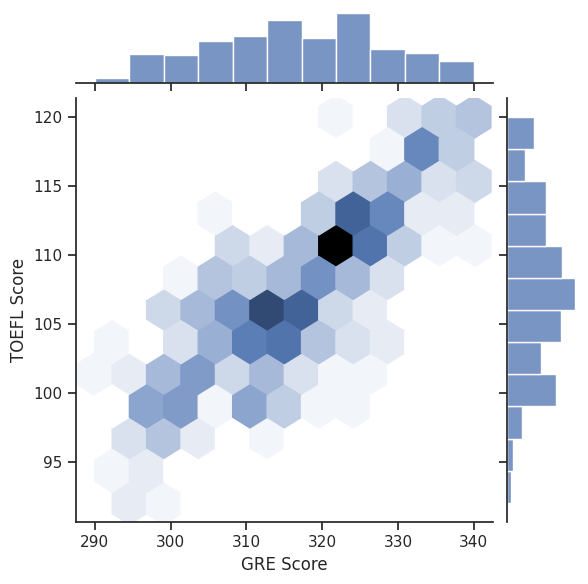

In [17]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data, kind='hex')

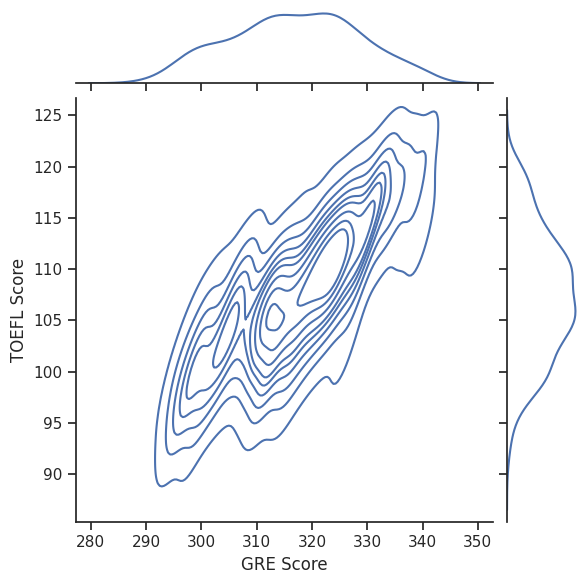

In [18]:
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data, kind='kde')

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

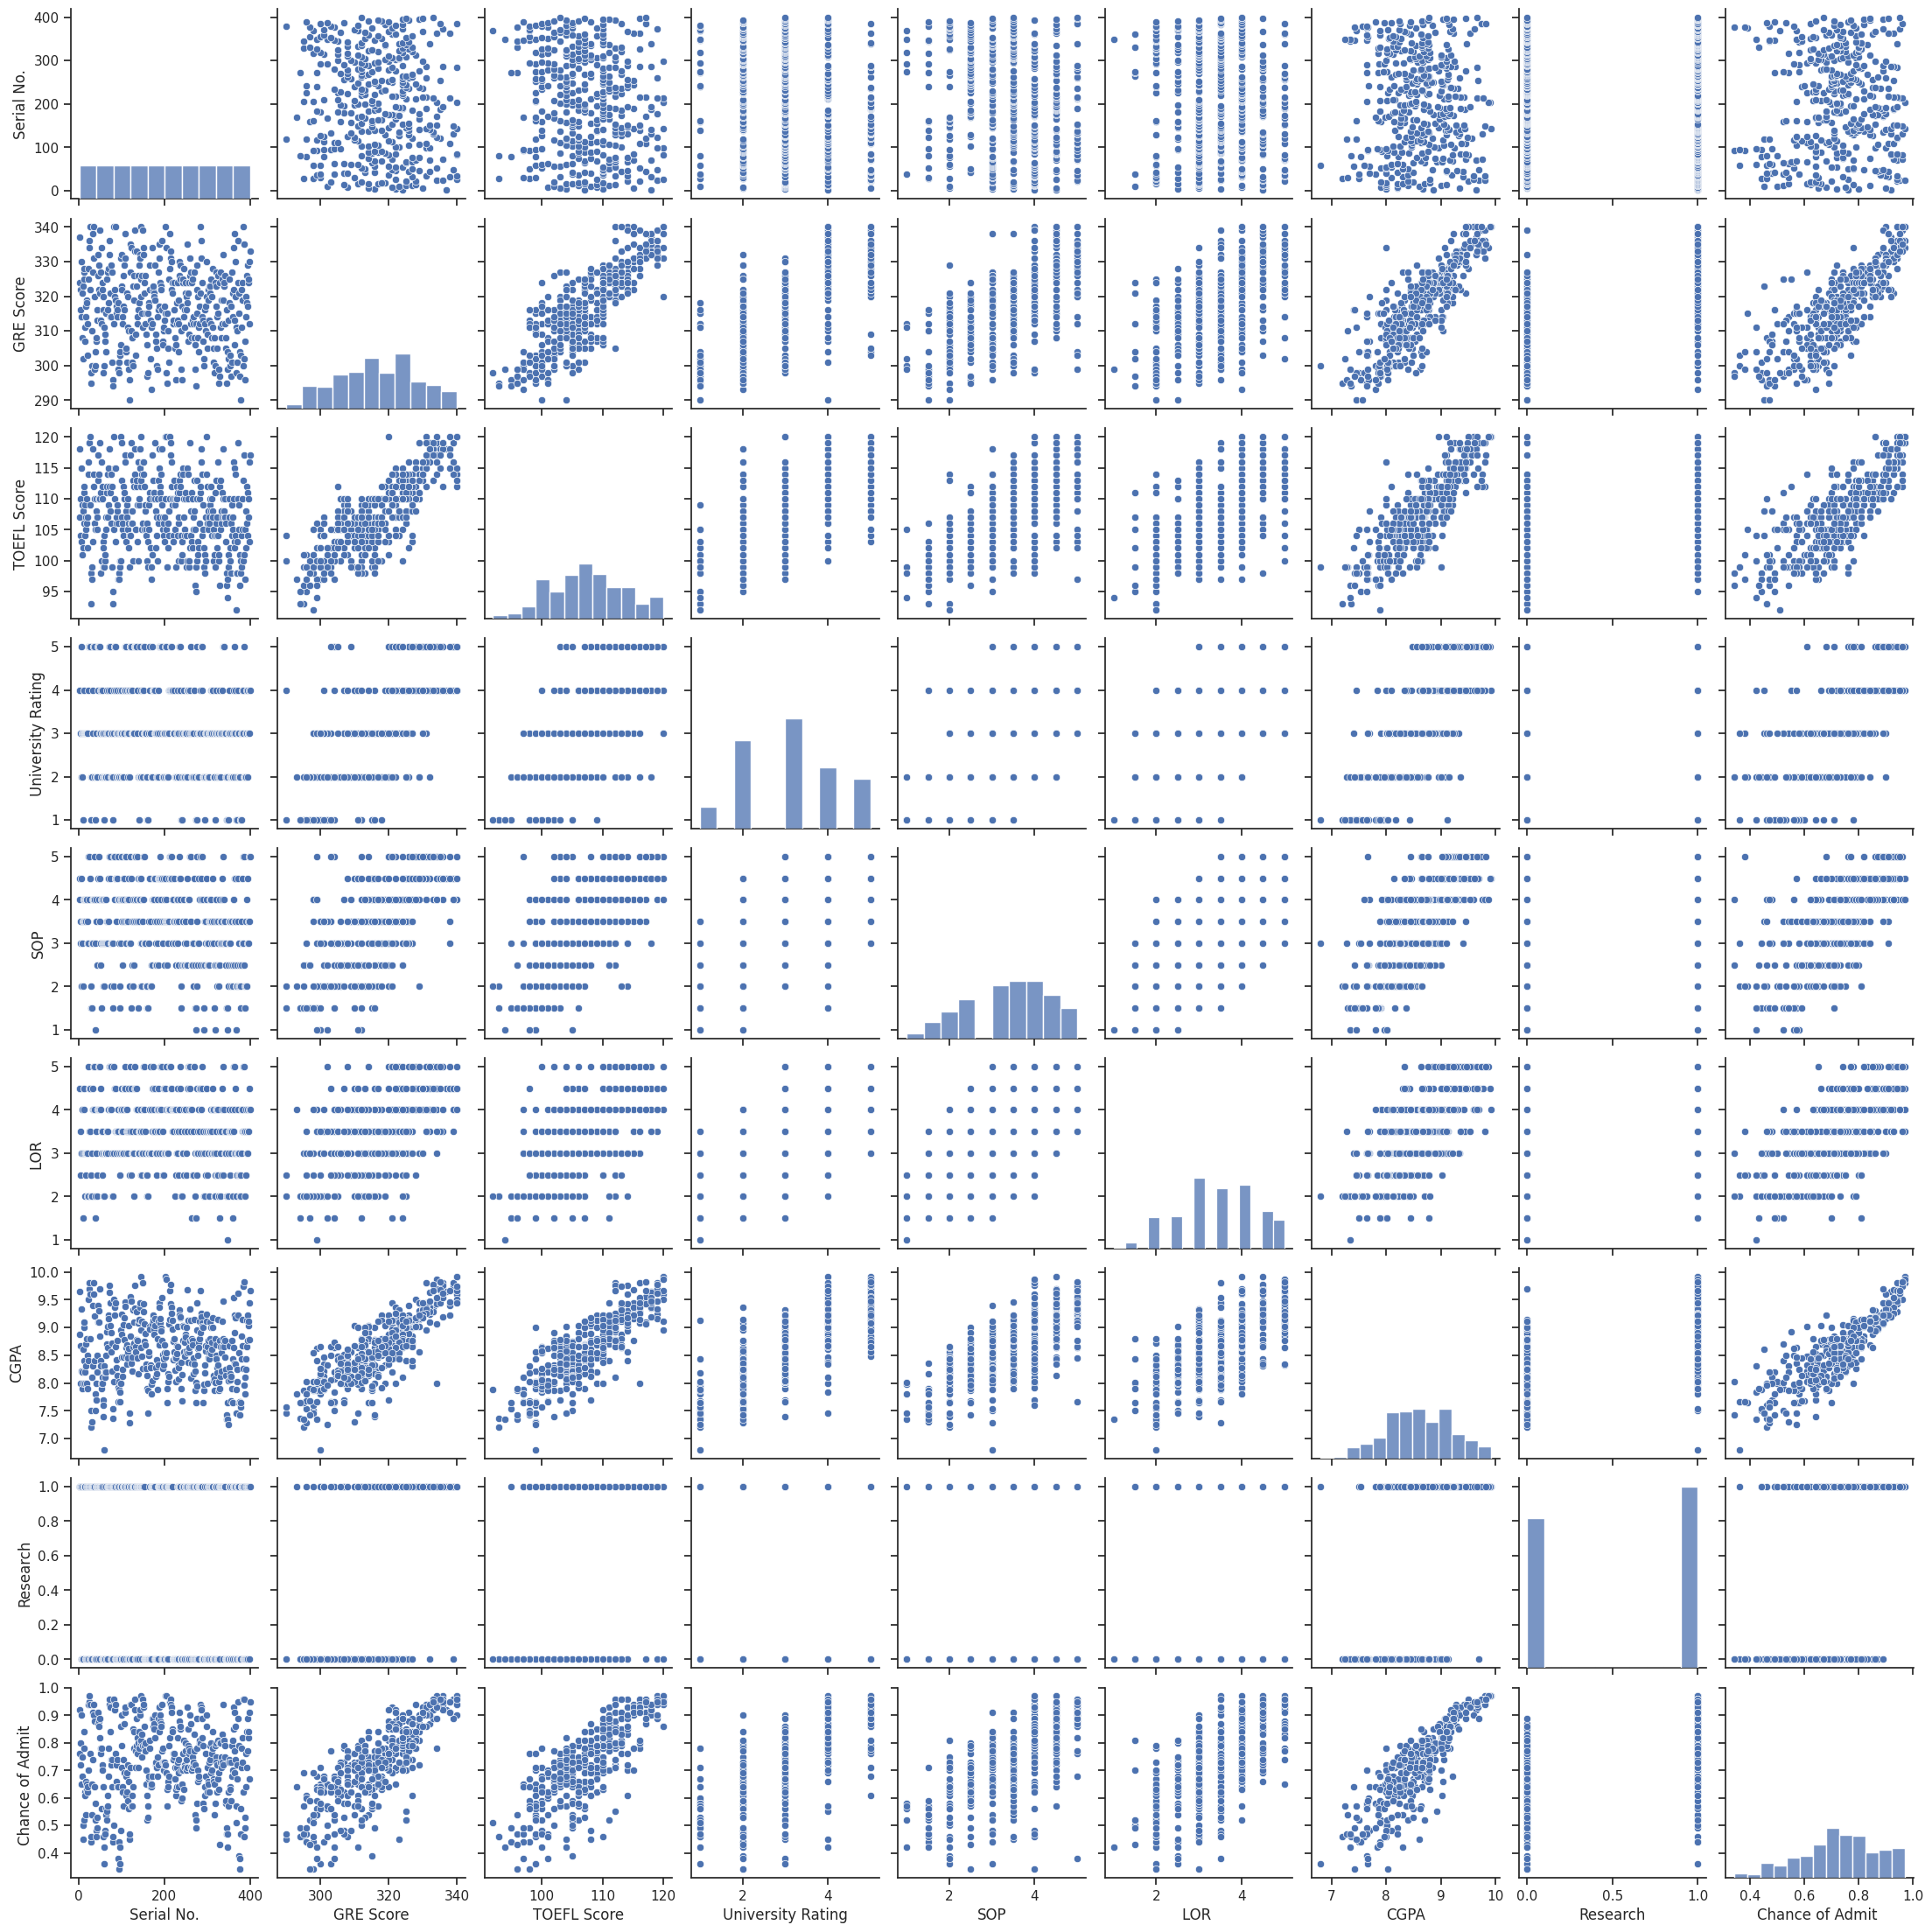

In [19]:
sns.pairplot(data)

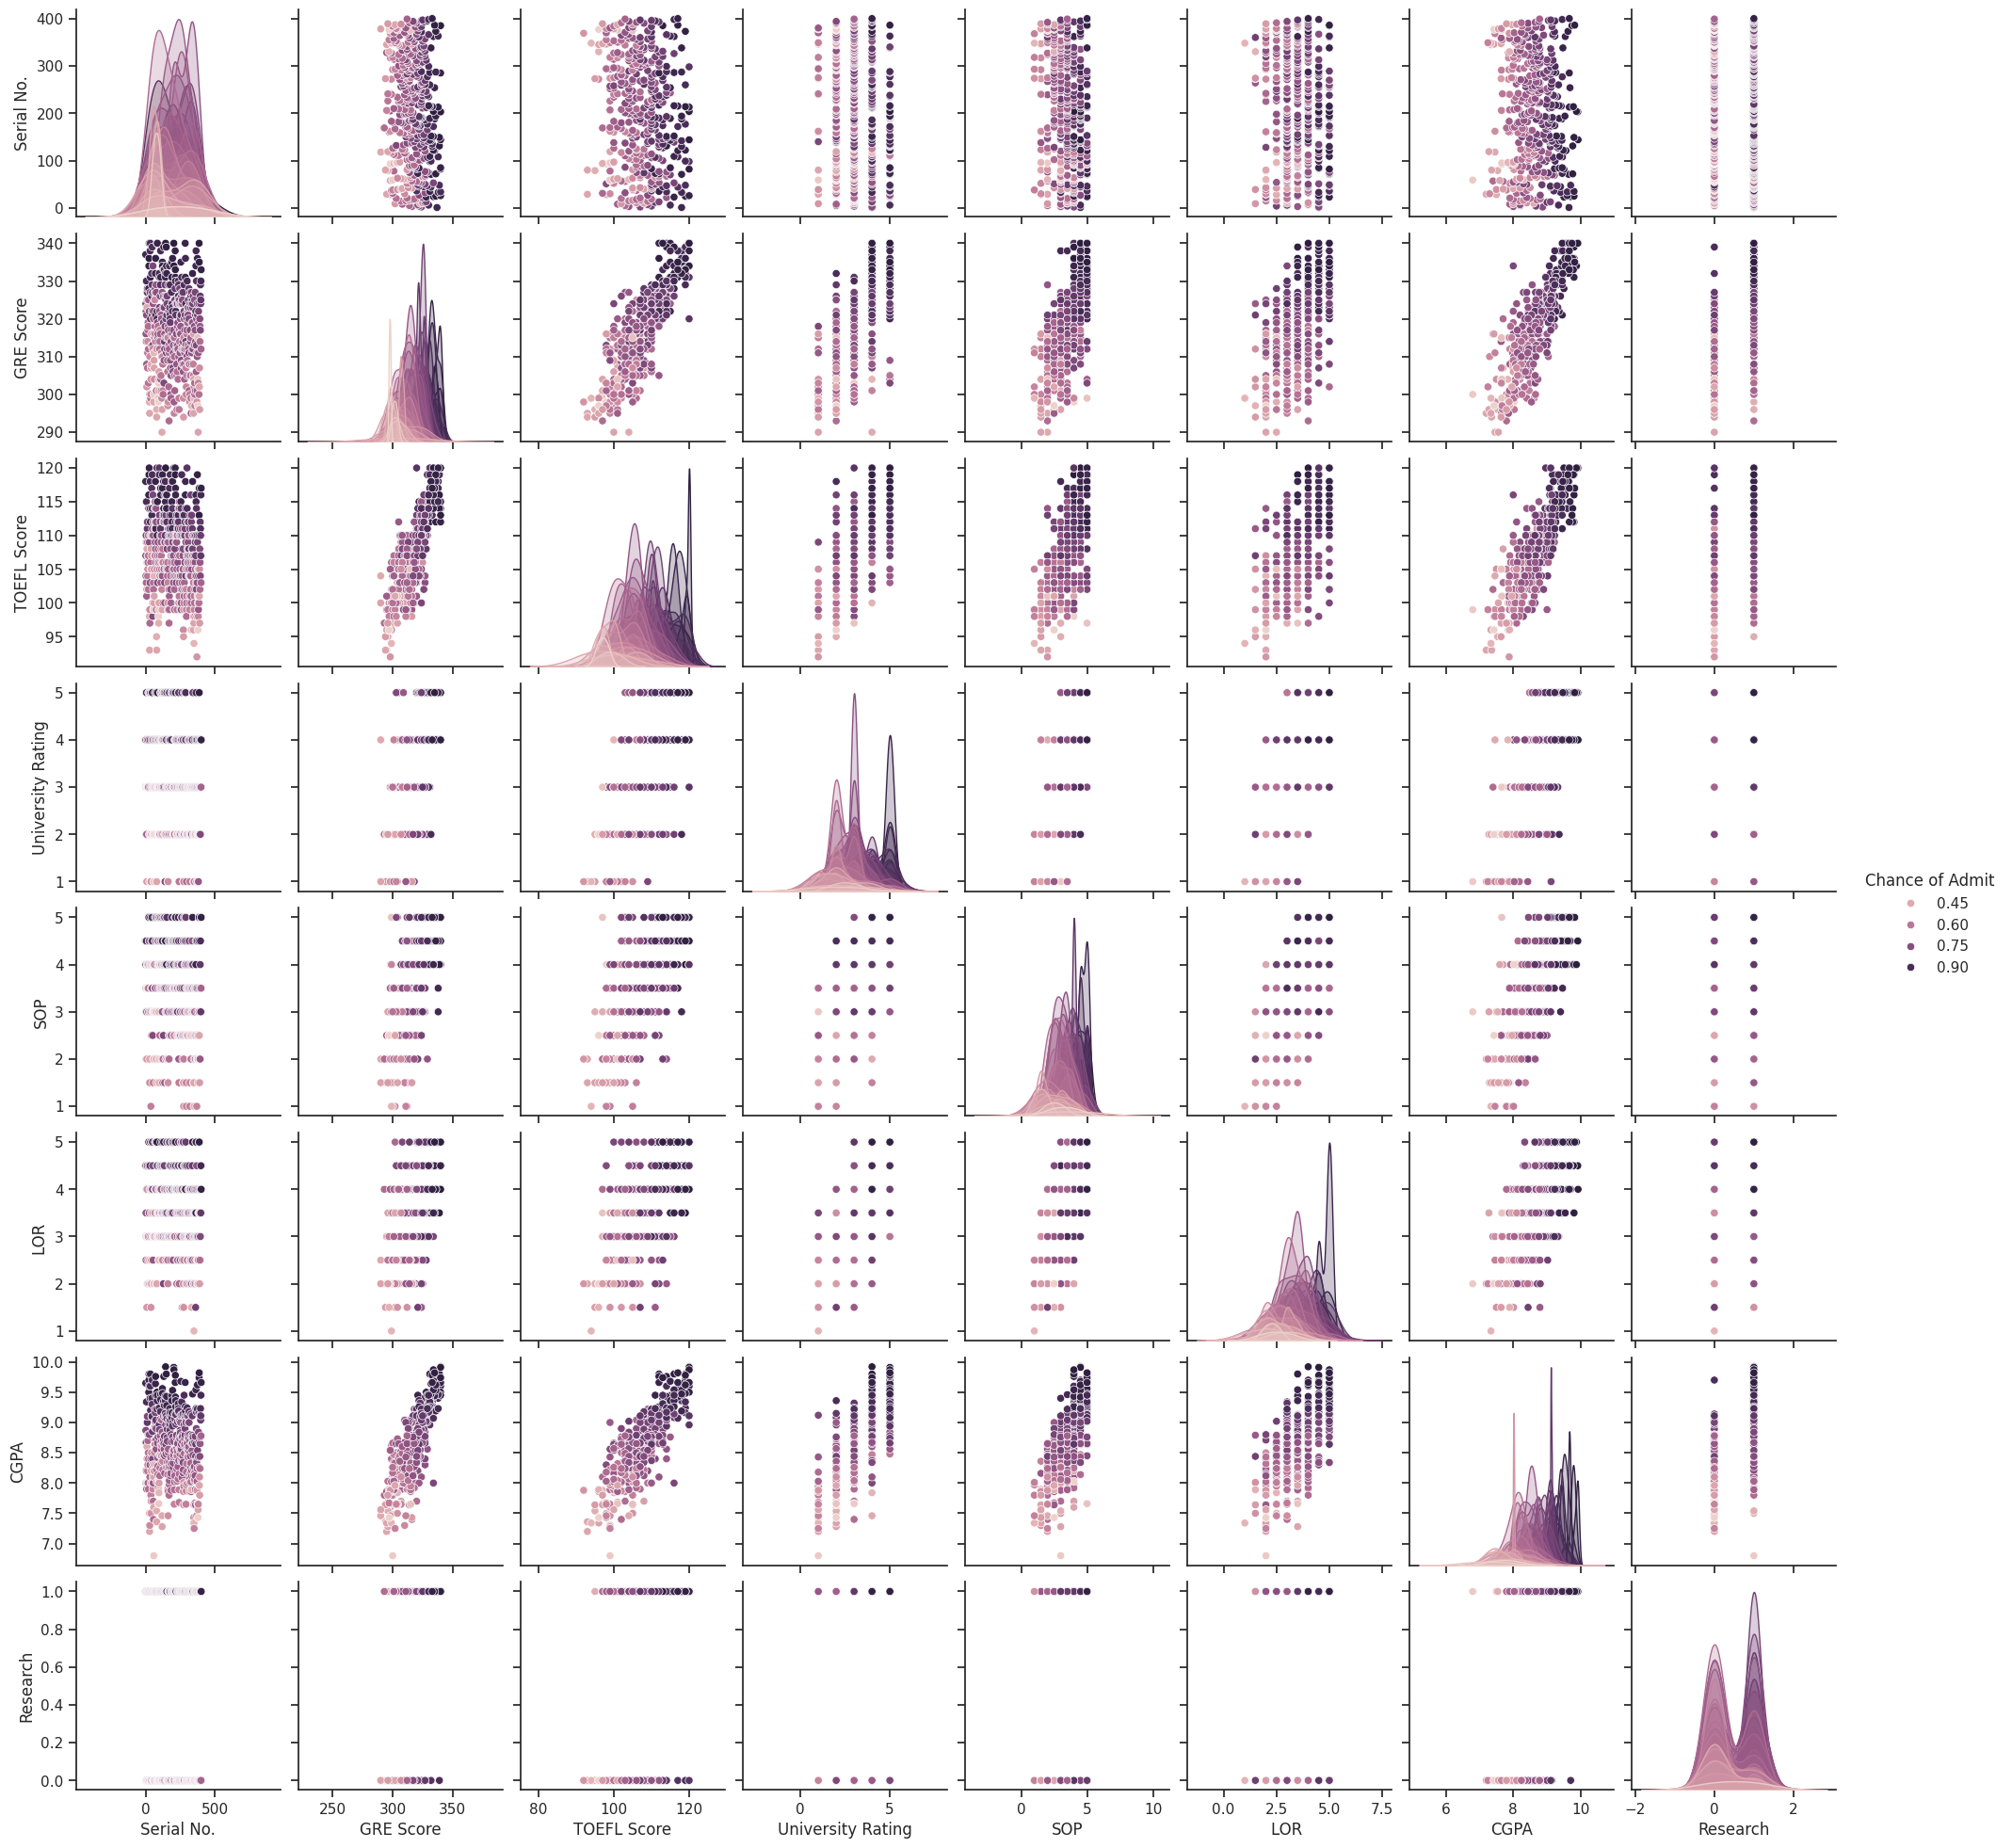

In [20]:
sns.pairplot(data, hue='Chance of Admit ')

### Ящик с усами
Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='GRE Score'>

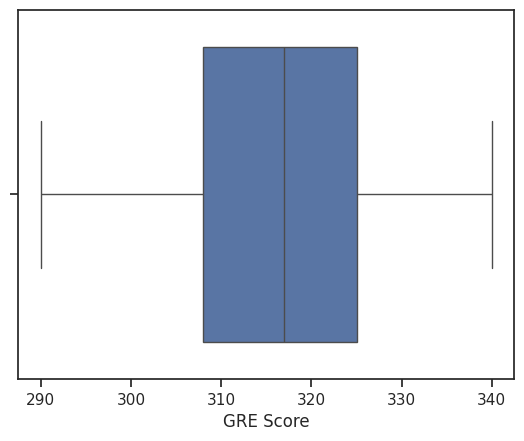

In [21]:
sns.boxplot(x=data['GRE Score'])

<AxesSubplot:ylabel='GRE Score'>

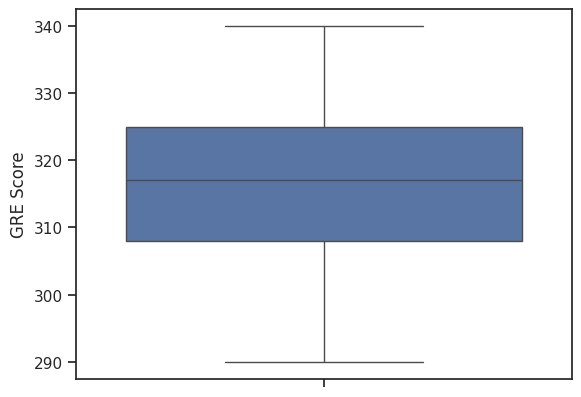

In [22]:
sns.boxplot(y=data['GRE Score'])

<AxesSubplot:xlabel='Chance of Admit ', ylabel='GRE Score'>

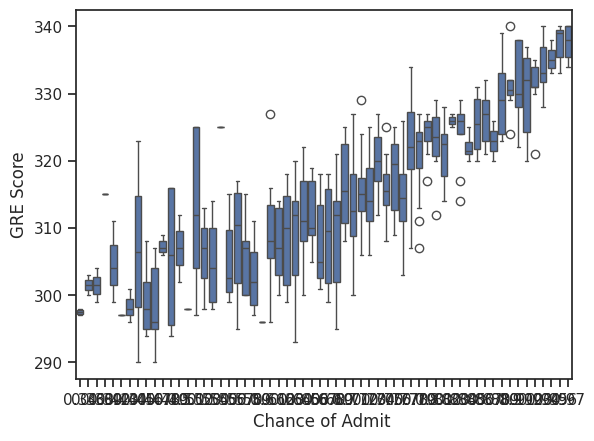

In [23]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Chance of Admit ', y='GRE Score', data=data)

### [Violin plot]
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности

<AxesSubplot:xlabel='GRE Score'>

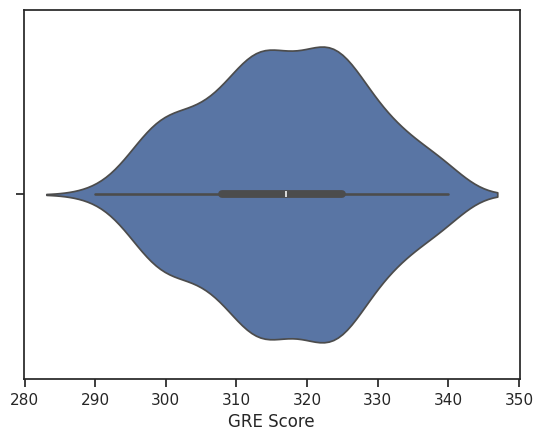

In [24]:
sns.violinplot(x=data['GRE Score'])

<ipython-input-25-57c201dd8568>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GRE Score'], ax=ax[1])


<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

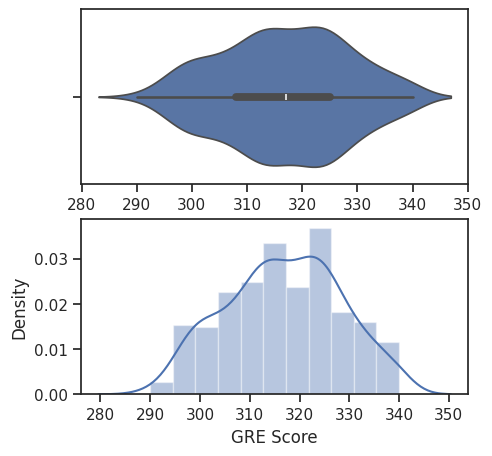

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(5,5))
sns.violinplot(ax=ax[0], x=data['GRE Score'])
sns.distplot(data['GRE Score'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

# Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Chance of Admit"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
1. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [29]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

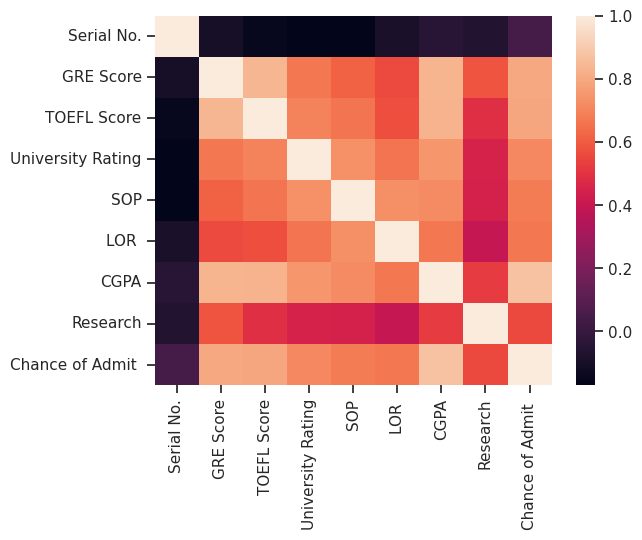

In [30]:
sns.heatmap(data.corr())

<AxesSubplot:>

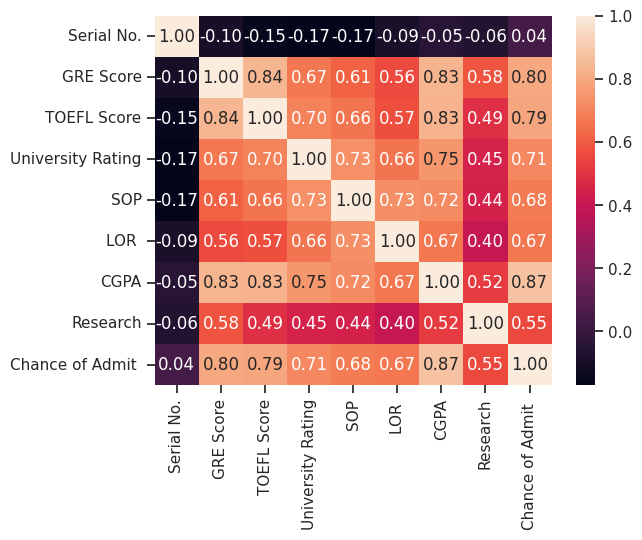

In [33]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.2f')

<AxesSubplot:>

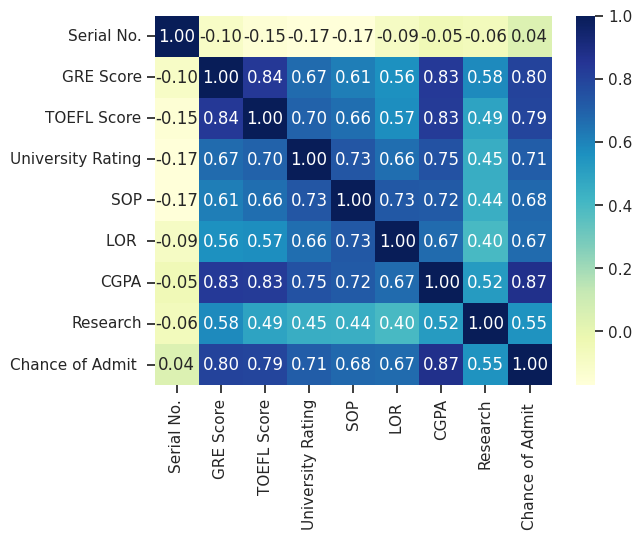

In [34]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

<AxesSubplot:>

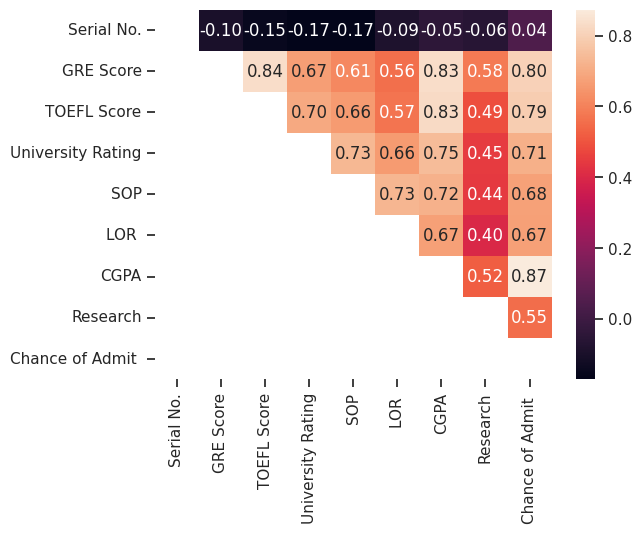

In [37]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.2f')

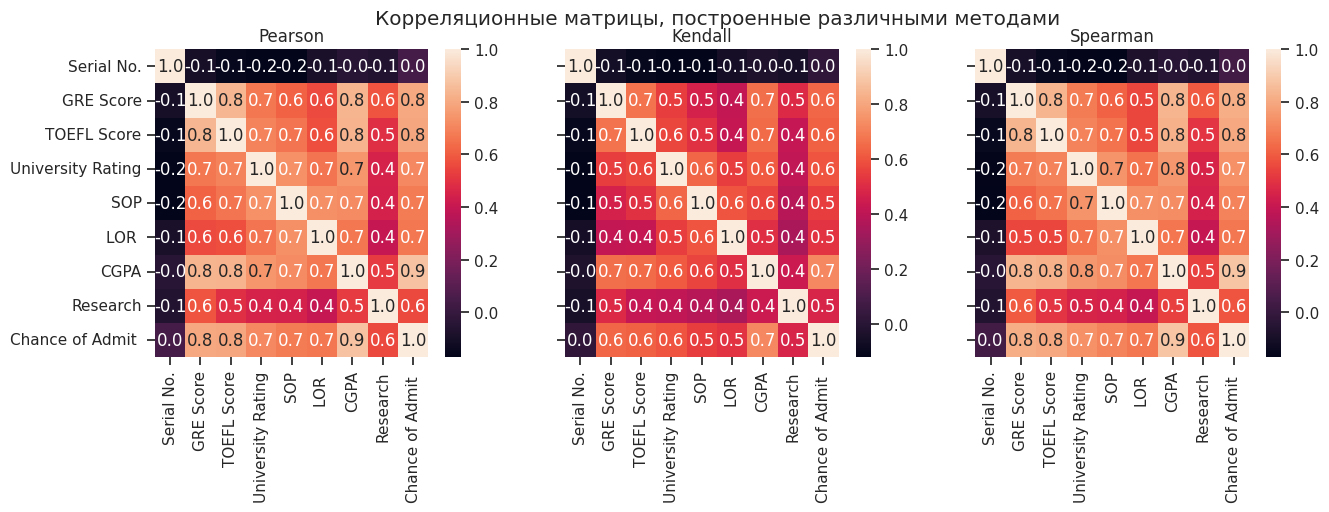

In [52]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,4))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.1f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.1f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

<AxesSubplot:>

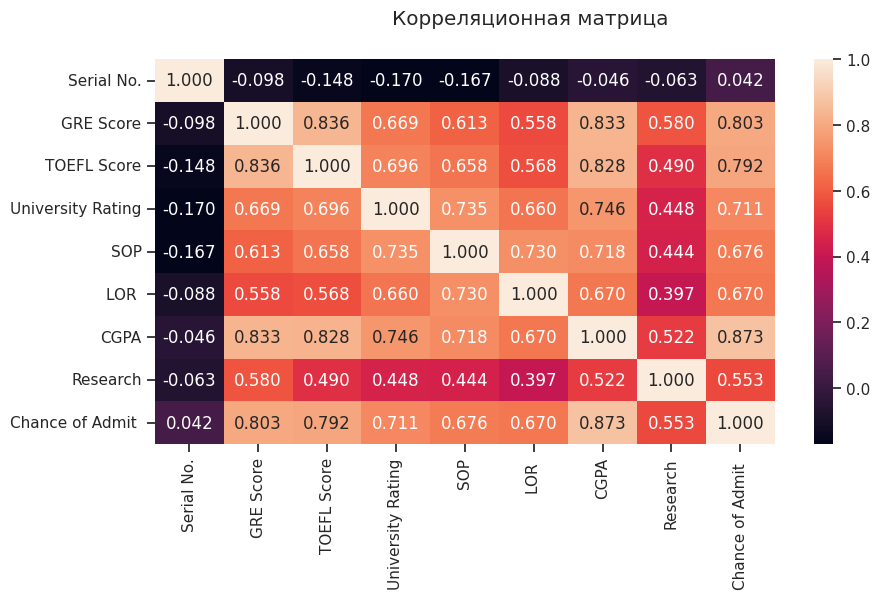

In [55]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')